In [1]:
require(e1071)

Loading required package: e1071


### set parameters

In [5]:
sd1 = 1
sd2 = 2
sd3 = 2
mean1 = 0.5
mean2 = 2
mean3 = 0
n = 1000

In [6]:
x1 = rnorm(n=n, mean=mean1, sd=sd1)
x2 = rnorm(n=n, mean=mean2, sd=sd2)
x3 = rnorm(n=n, mean=mean3, sd=sd3)
x4 = rnorm(n=n, mean=0, sd=4) # not relevent
y = ifelse((x1-mean1)^2+2*(x2-mean2)^2+x3<2, 1, -1)

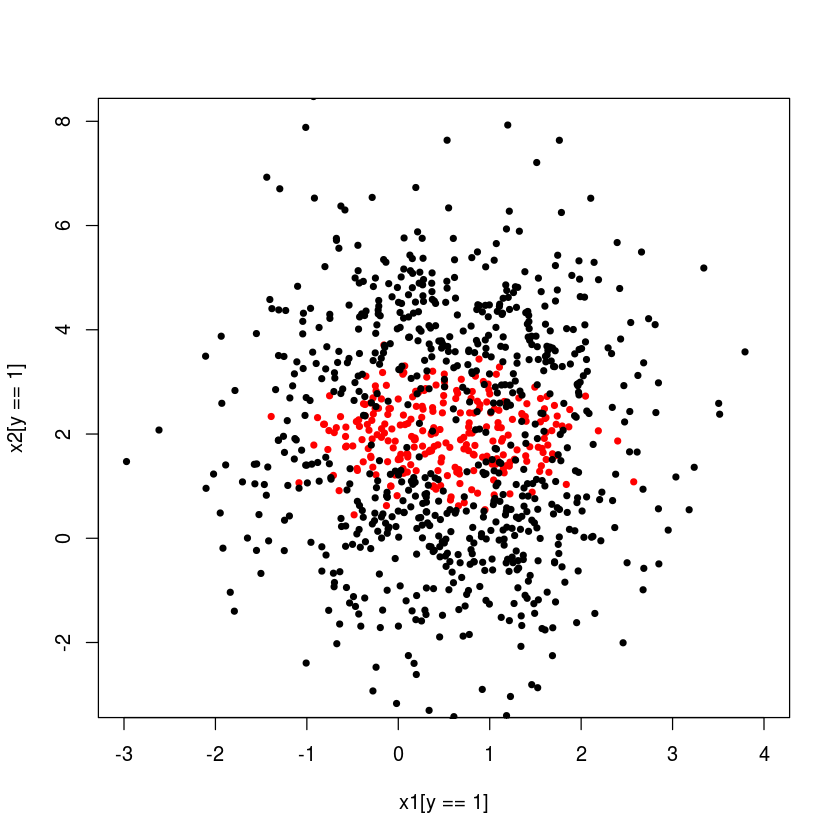

In [7]:
plot(x=x1[y==1], y=x2[y==1], pch=20, col='red', xlim=c(-3,4), ylim=c(-3,8))
points(x=x1[y==-1], y=x2[y==-1], pch=20, col='black')

In [8]:
dat = data.frame(y=y, x1=x1, x2=x2, x3=x3, x4=x4)
dat_train = dat[1:(nrow(dat)*3/4),]
dat_test = dat[(nrow(dat)*3/4+1):nrow(dat),]
print (nrow(dat_train))
print (nrow(dat_test))

[1] 750
[1] 250


### model1: linear boundary

In [9]:
svmout = tune.svm(factor(y)~x1+x2, data=dat_train, scale=TRUE, kernel='linear', cost = c(0.1,1,10,100))
summary(svmout)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  0.1

- best performance: 0.2426667 

- Detailed performance results:
   cost     error dispersion
1   0.1 0.2426667 0.05989291
2   1.0 0.2426667 0.05989291
3  10.0 0.2426667 0.05989291
4 100.0 0.2426667 0.05989291


percent correct  0.7

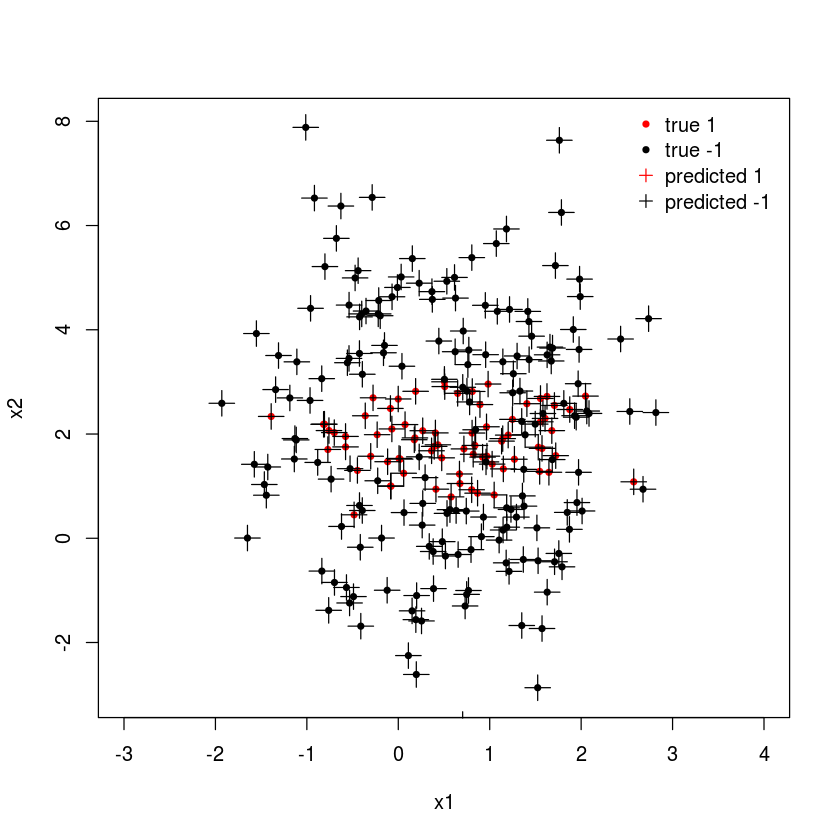

In [10]:
plot(x=dat_test$x1[dat_test$y==1], y=dat_test$x2[dat_test$y==1], pch=20, col='red', xlim=c(-3,4), ylim=c(-3,8), xlab="x1", ylab='x2')
points(x=dat_test$x1[dat_test$y==-1], y=dat_test$x2[dat_test$y==-1], pch=20, col='black')
predicted = predict(svmout$best.model, dat_test)
points(x=dat_test$x1[predicted==1], y=dat_test$x2[predicted==1], pch=3, col='red', cex=2)
points(x=dat_test$x1[predicted==-1], y=dat_test$x2[predicted==-1], pch=3, col='black', cex=2)
legend(x="topright", pch=c(20,20,3,3), col=c('red','black','red','black'), legend=c('true 1', 'true -1', 'predicted 1', 'predicted -1'), bty='n')

cat("percent correct ", sum(predicted==dat_test$y)/nrow(dat_test))

### model2: polynomial boundary, degree=2

In [29]:
?svm

In [11]:
svmout2 = tune.svm(factor(y)~x1+x2, data=dat_train, scale=TRUE, kernel='polynomial', degree=2, cost = c(0.1,1,10,100))
summary(svmout2)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 degree cost
      2   10

- best performance: 0.1453333 

- Detailed performance results:
  degree  cost     error dispersion
1      2   0.1 0.2426667 0.04014787
2      2   1.0 0.1466667 0.03823256
3      2  10.0 0.1453333 0.03794733
4      2 100.0 0.1466667 0.03442652


percent correct  0.868

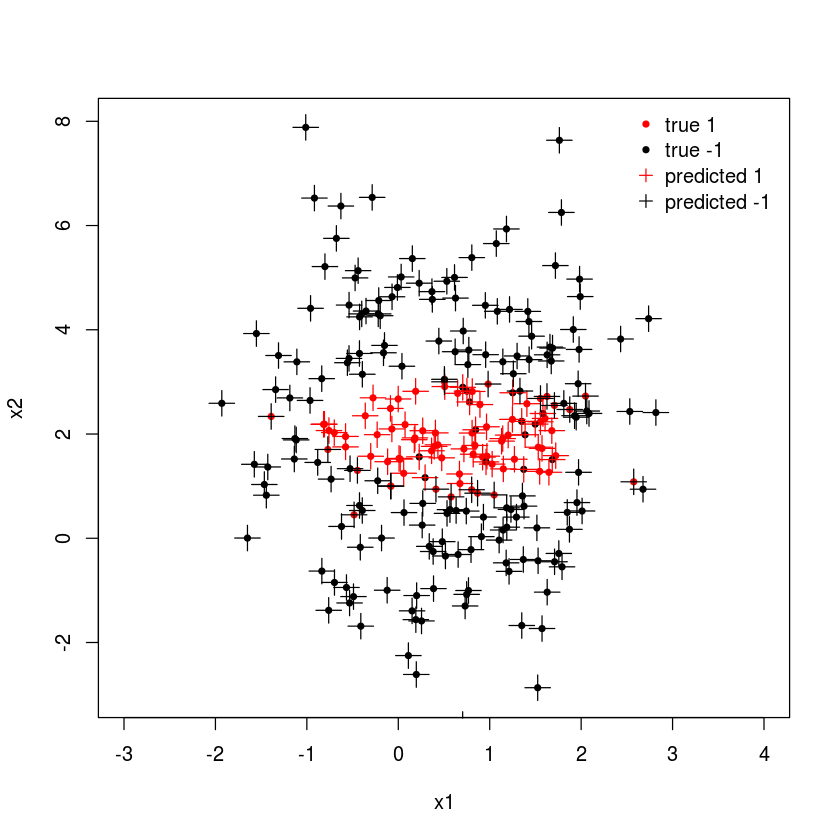

In [12]:
plot(x=dat_test$x1[dat_test$y==1], y=dat_test$x2[dat_test$y==1], pch=20, col='red', xlim=c(-3,4), ylim=c(-3,8), xlab="x1", ylab='x2')
points(x=dat_test$x1[dat_test$y==-1], y=dat_test$x2[dat_test$y==-1], pch=20, col='black')
predicted = predict(svmout2$best.model, dat_test)
points(x=dat_test$x1[predicted==1], y=dat_test$x2[predicted==1], pch=3, col='red', cex=2)
points(x=dat_test$x1[predicted==-1], y=dat_test$x2[predicted==-1], pch=3, col='black', cex=2)
legend(x="topright", pch=c(20,20,3,3), col=c('red','black','red','black'), legend=c('true 1', 'true -1', 'predicted 1', 'predicted -1'), bty='n')

cat("percent correct ", sum(predicted==dat_test$y)/nrow(dat_test))

### model3: polynomial boundary, degree=3

In [13]:
svmout3 = tune.svm(factor(y)~x1+x2, data=dat_train, scale=TRUE, kernel='polynomial', degree=3, cost = c(0.1,1,10,100))
summary(svmout3)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 degree cost
      3  0.1

- best performance: 0.2426667 

- Detailed performance results:
  degree  cost     error dispersion
1      3   0.1 0.2426667 0.05788025
2      3   1.0 0.2426667 0.05788025
3      3  10.0 0.2426667 0.05788025
4      3 100.0 0.2426667 0.05788025


percent correct  0.7

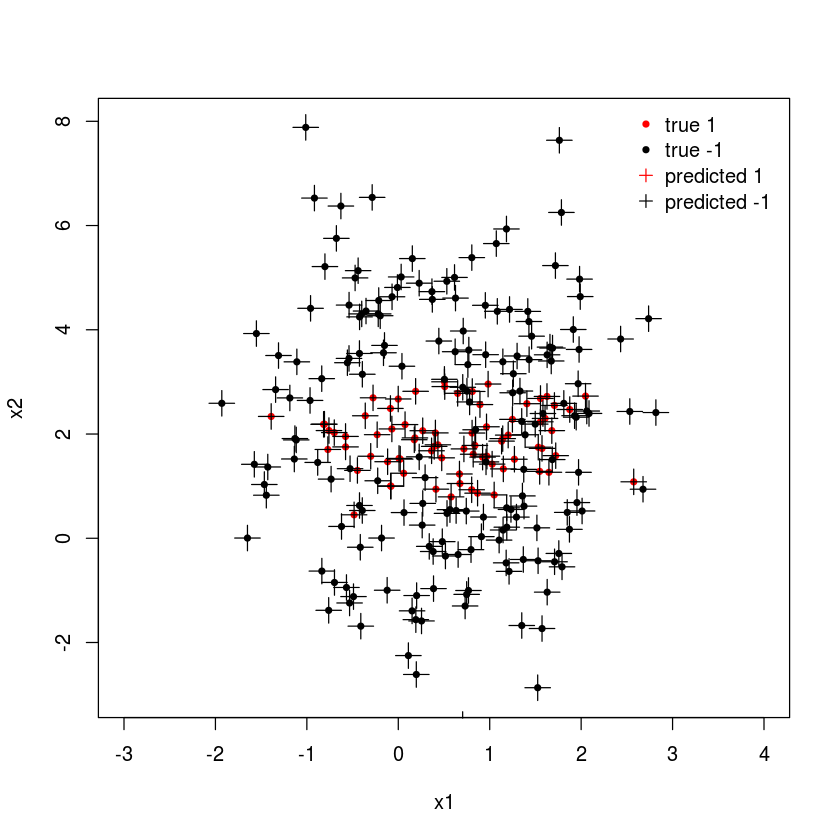

In [14]:
plot(x=dat_test$x1[dat_test$y==1], y=dat_test$x2[dat_test$y==1], pch=20, col='red', xlim=c(-3,4), ylim=c(-3,8), xlab="x1", ylab='x2')
points(x=dat_test$x1[dat_test$y==-1], y=dat_test$x2[dat_test$y==-1], pch=20, col='black')
predicted = predict(svmout3$best.model, dat_test)
points(x=dat_test$x1[predicted==1], y=dat_test$x2[predicted==1], pch=3, col='red', cex=2)
points(x=dat_test$x1[predicted==-1], y=dat_test$x2[predicted==-1], pch=3, col='black', cex=2)
legend(x="topright", pch=c(20,20,3,3), col=c('red','black','red','black'), legend=c('true 1', 'true -1', 'predicted 1', 'predicted -1'), bty='n')

cat("percent correct ", sum(predicted==dat_test$y)/nrow(dat_test))

### model4: polynomial boundary, degree=2, with irrelevant predictor

In [15]:
svmout4 = tune.svm(factor(y)~x1+x2+x4, data=dat_train, scale=TRUE, kernel='polynomial', degree=2, cost = c(0.1,1,10,100))
summary(svmout4)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 degree cost
      2  100

- best performance: 0.1453333 

- Detailed performance results:
  degree  cost     error dispersion
1      2   0.1 0.2426667 0.05399588
2      2   1.0 0.1573333 0.04390787
3      2  10.0 0.1493333 0.03812909
4      2 100.0 0.1453333 0.04190524


percent correct  0.872

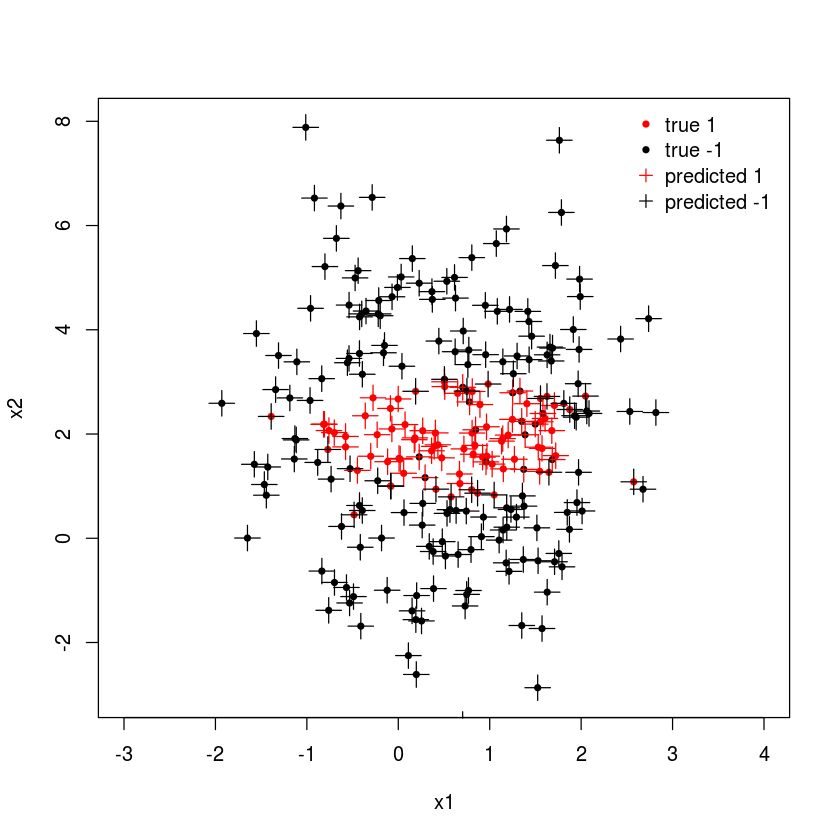

In [16]:
plot(x=dat_test$x1[dat_test$y==1], y=dat_test$x2[dat_test$y==1], pch=20, col='red', xlim=c(-3,4), ylim=c(-3,8), xlab="x1", ylab='x2')
points(x=dat_test$x1[dat_test$y==-1], y=dat_test$x2[dat_test$y==-1], pch=20, col='black')
predicted = predict(svmout4$best.model, dat_test)
points(x=dat_test$x1[predicted==1], y=dat_test$x2[predicted==1], pch=3, col='red', cex=2)
points(x=dat_test$x1[predicted==-1], y=dat_test$x2[predicted==-1], pch=3, col='black', cex=2)
legend(x="topright", pch=c(20,20,3,3), col=c('red','black','red','black'), legend=c('true 1', 'true -1', 'predicted 1', 'predicted -1'), bty='n')

cat("percent correct ", sum(predicted==dat_test$y)/nrow(dat_test))

### model5: radial kernel

In [17]:
svmout5 = tune.svm(factor(y)~x1+x2+x4, data=dat_train, scale=TRUE, kernel='radial', cost = c(0.1,1,10,100))
summary(svmout5)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.1506667 

- Detailed performance results:
   cost     error dispersion
1   0.1 0.2426667 0.06247567
2   1.0 0.1693333 0.03825838
3  10.0 0.1506667 0.03825838
4 100.0 0.1546667 0.04131182


percent correct  0.868

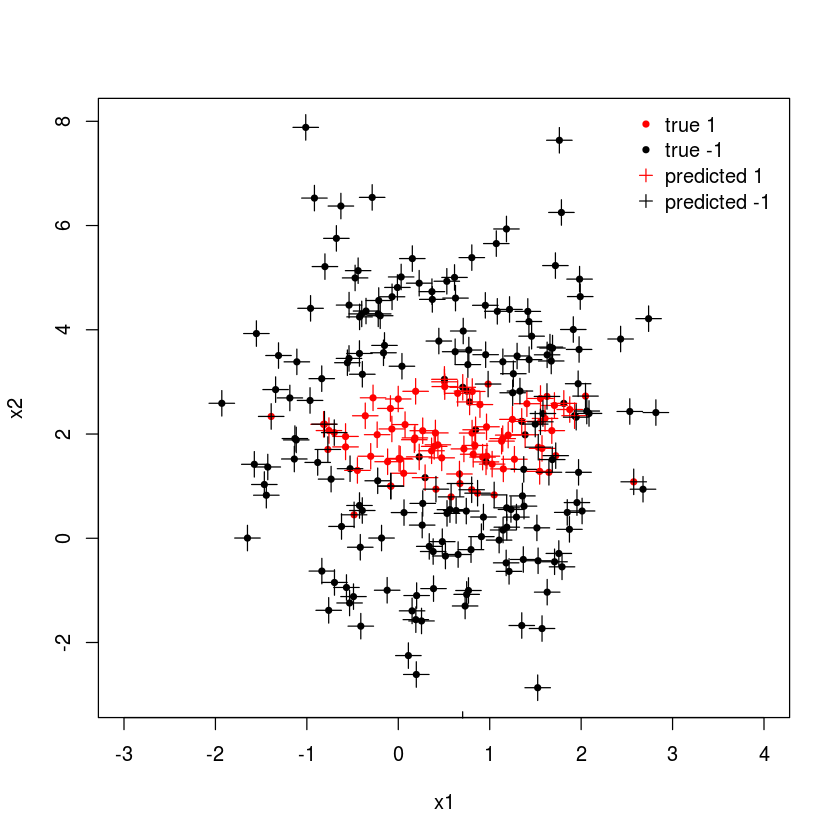

In [18]:
plot(x=dat_test$x1[dat_test$y==1], y=dat_test$x2[dat_test$y==1], pch=20, col='red', xlim=c(-3,4), ylim=c(-3,8), xlab="x1", ylab='x2')
points(x=dat_test$x1[dat_test$y==-1], y=dat_test$x2[dat_test$y==-1], pch=20, col='black')
predicted = predict(svmout5$best.model, dat_test)
points(x=dat_test$x1[predicted==1], y=dat_test$x2[predicted==1], pch=3, col='red', cex=2)
points(x=dat_test$x1[predicted==-1], y=dat_test$x2[predicted==-1], pch=3, col='black', cex=2)
legend(x="topright", pch=c(20,20,3,3), col=c('red','black','red','black'), legend=c('true 1', 'true -1', 'predicted 1', 'predicted -1'), bty='n')

cat("percent correct ", sum(predicted==dat_test$y)/nrow(dat_test))